In [556]:
# Bước 1: Import thư viện

In [557]:
import pandas as pd # type: ignore #đọc dữ liệu
import numpy as np #xử lý dữ liệu
import matplotlib.pyplot as plt #vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình

#các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào
# from keras.layers import SimpleRNN #học phụ thuộc
# from keras.layers import SimpleRNN
from keras.layers import RNN, SimpleRNNCell #học phụ thuộc
from keras.layers import Embedding 
from keras.layers import Dropout #tránh học tủ
from keras.layers import Dense #đầu ra

#kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error #đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #đo % sai số tuyệt đối trung bình

In [558]:
# Bước 1: Import thư viện

In [559]:
import pandas as pd # type: ignore #đọc dữ liệu
import numpy as np #xử lý dữ liệu
import matplotlib.pyplot as plt #vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình

#các lớp để xây dựng mô hình
from my_library_keras_rnn.models_seq import Sequential #đầu vào
from my_library_keras_rnn.layers_lstm import LSTM #học phụ thuộc
from my_library_keras_rnn.layers_rnn import RNN
from my_library_keras_rnn.layer_emb import Embedding
from my_library_keras_rnn.layer_drop import Dropout #tránh học tủ
from my_library_keras_rnn.layer_den import Dense #đầu ra

#kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error #đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #đo % sai số tuyệt đối trung bình

# Bước 2: Đọc dữ liệu

In [560]:
# đọc dữ liệu từ file csv
df = pd.read_csv('D:\\Documents For Study\\Source Code\\RNN_ver2\\RNNs\\StockPredictVinamilk\\dataset.csv')

# Xóa hai dòng "KL" và "Thay đổi %" từ DataFrame dataSet
df = df.drop(columns=["KL", "% Thay đổi"])

# Hiển thị lại DataFrame sau khi xóa
print(df)

            Ngày  Đóng cửa    Mở cửa  Cao nhất Thấp nhất
0     22/07/2023  75,200.0  73,500.0  75,800.0  73,100.0
1     21/07/2023  73,500.0  72,500.0  75,000.0  72,400.0
2     20/07/2023  72,700.0  72,600.0  72,900.0  72,300.0
3     19/07/2023  72,600.0  72,500.0  73,000.0  72,400.0
4     18/07/2023  72,400.0  72,500.0  72,600.0  72,200.0
...          ...       ...       ...       ...       ...
2501  16/07/2013  96,528.0  95,139.0  97,222.0  95,139.0
2502  15/07/2013  95,139.0  95,139.0  95,833.0  94,444.0
2503  12/07/2013  95,139.0  94,444.0  95,139.0  93,750.0
2504  11/07/2013  94,444.0  94,444.0  95,139.0  93,750.0
2505  10/07/2013  94,444.0  95,139.0  95,833.0  94,444.0

[2506 rows x 5 columns]


# Bước 3: Mô tả dữ liệu

In [561]:
#định dạng cấu trúc thời gian
df["Ngày"] = pd.to_datetime(df.Ngày,format="%d/%m/%Y")

In [562]:
#kích thước dữ liệu
df.shape

(2506, 5)

In [563]:
#dữ liệu 5 dòng đầu
df.head()

,Ngày,Đóng cửa,Mở cửa,Cao nhất,Thấp nhất
0,2023-07-22,"75,200.0","73,500.0","75,800.0","73,100.0"
1,2023-07-21,"73,500.0","72,500.0","75,000.0","72,400.0"
2,2023-07-20,"72,700.0","72,600.0","72,900.0","72,300.0"
3,2023-07-19,"72,600.0","72,500.0","73,000.0","72,400.0"
4,2023-07-18,"72,400.0","72,500.0","72,600.0","72,200.0"


In [564]:
#xác định kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ngày       2506 non-null   datetime64[ns]
 1   Đóng cửa   2506 non-null   object        
 2   Mở cửa     2506 non-null   object        
 3   Cao nhất   2506 non-null   object        
 4   Thấp nhất  2506 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 98.0+ KB


In [565]:
#mô tả bộ dữ liệu
df.describe()

,Ngày
count,2506
mean,2018-07-18 09:48:59.185953536
min,2013-07-10 00:00:00
25%,2016-01-13 06:00:00
50%,2018-07-19 12:00:00
75%,2021-01-14 18:00:00
max,2023-07-22 00:00:00


# Bước 4: Tiền xử lý dữ liệu

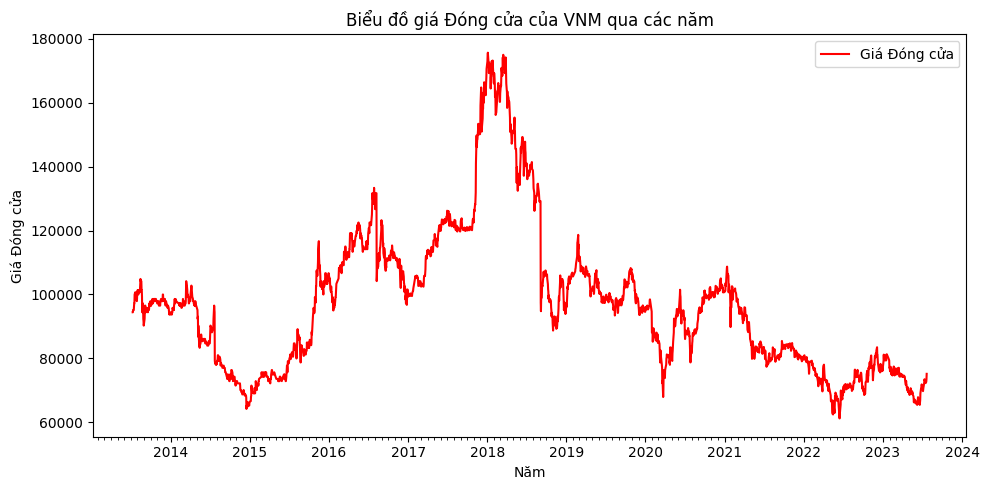

In [566]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator # Thêm MonthLocator vào để sửa lỗi

# Chuyển đổi cột "Ngày" sang dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Sắp xếp lại dữ liệu theo thứ tự thời gian
df = df.sort_values(by='Ngày')

# Chuyển đổi định dạng các cột giá thành số thực
df['Đóng cửa'] = df['Đóng cửa'].str.replace(',', '').astype(float)
df['Mở cửa'] = df['Mở cửa'].str.replace(',', '').astype(float)
df['Cao nhất'] = df['Cao nhất'].str.replace(',', '').astype(float)
df['Thấp nhất'] = df['Thấp nhất'].str.replace(',', '').astype(float)

# Lấy thông tin năm từ cột "Ngày"
df['Năm'] = df['Ngày'].dt.year

# Tạo đồ thị giá đóng cửa qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df['Ngày'], df['Đóng cửa'], label='Giá Đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá Đóng cửa')
plt.title('Biểu đồ giá Đóng cửa của VNM qua các năm')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()


In [567]:
df1 = pd.DataFrame(df,columns=['Ngày','Đóng cửa'])
df1.index = df1.Ngày
df1.drop('Ngày',axis=1,inplace=True)
df1

,Đóng cửa
Ngày,
2013-07-10,94444.0
2013-07-11,94444.0
2013-07-12,95139.0
2013-07-15,95139.0
2013-07-16,96528.0
...,...
2023-07-18,72400.0
2023-07-19,72600.0
2023-07-20,72700.0


In [568]:
#chia tập dữ liệu
data = df1.values
train_data = data[:1500]
test_data = data[1500:]

In [569]:
data

array([[94444.],
       [94444.],
       [95139.],
       ...,
       [72700.],
       [73500.],
       [75200.]])

In [570]:
# Bước 1: Import thư viện

In [571]:
import pandas as pd # type: ignore #đọc dữ liệu
import numpy as np #xử lý dữ liệu
import matplotlib.pyplot as plt #vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình

#các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào
# from keras.layers import SimpleRNN #học phụ thuộc
# from keras.layers import SimpleRNN
from keras.layers import RNN, SimpleRNNCell #học phụ thuộc
from keras.layers import Embedding 
from keras.layers import Dropout #tránh học tủ
from keras.layers import Dense #đầu ra

#kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error #đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #đo % sai số tuyệt đối trung bình

# Bước 2: Đọc dữ liệu

In [572]:
# đọc dữ liệu từ file csv
df = pd.read_csv('D:\\Documents For Study\\Source Code\\RNN_ver2\\RNNs\\StockPredictVinamilk\\dataset.csv')

# Xóa hai dòng "KL" và "Thay đổi %" từ DataFrame dataSet
df = df.drop(columns=["KL", "% Thay đổi"])

# Hiển thị lại DataFrame sau khi xóa
print(df)

            Ngày  Đóng cửa    Mở cửa  Cao nhất Thấp nhất
0     22/07/2023  75,200.0  73,500.0  75,800.0  73,100.0
1     21/07/2023  73,500.0  72,500.0  75,000.0  72,400.0
2     20/07/2023  72,700.0  72,600.0  72,900.0  72,300.0
3     19/07/2023  72,600.0  72,500.0  73,000.0  72,400.0
4     18/07/2023  72,400.0  72,500.0  72,600.0  72,200.0
...          ...       ...       ...       ...       ...
2501  16/07/2013  96,528.0  95,139.0  97,222.0  95,139.0
2502  15/07/2013  95,139.0  95,139.0  95,833.0  94,444.0
2503  12/07/2013  95,139.0  94,444.0  95,139.0  93,750.0
2504  11/07/2013  94,444.0  94,444.0  95,139.0  93,750.0
2505  10/07/2013  94,444.0  95,139.0  95,833.0  94,444.0

[2506 rows x 5 columns]


# Bước 3: Mô tả dữ liệu

In [573]:
#định dạng cấu trúc thời gian
df["Ngày"] = pd.to_datetime(df.Ngày,format="%d/%m/%Y")

In [574]:
#kích thước dữ liệu
df.shape

(2506, 5)

In [575]:
#dữ liệu 5 dòng đầu
df.head()

,Ngày,Đóng cửa,Mở cửa,Cao nhất,Thấp nhất
0,2023-07-22,"75,200.0","73,500.0","75,800.0","73,100.0"
1,2023-07-21,"73,500.0","72,500.0","75,000.0","72,400.0"
2,2023-07-20,"72,700.0","72,600.0","72,900.0","72,300.0"
3,2023-07-19,"72,600.0","72,500.0","73,000.0","72,400.0"
4,2023-07-18,"72,400.0","72,500.0","72,600.0","72,200.0"


In [576]:
#xác định kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ngày       2506 non-null   datetime64[ns]
 1   Đóng cửa   2506 non-null   object        
 2   Mở cửa     2506 non-null   object        
 3   Cao nhất   2506 non-null   object        
 4   Thấp nhất  2506 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 98.0+ KB


In [577]:
#mô tả bộ dữ liệu
df.describe()

,Ngày
count,2506
mean,2018-07-18 09:48:59.185953536
min,2013-07-10 00:00:00
25%,2016-01-13 06:00:00
50%,2018-07-19 12:00:00
75%,2021-01-14 18:00:00
max,2023-07-22 00:00:00


# Bước 4: Tiền xử lý dữ liệu

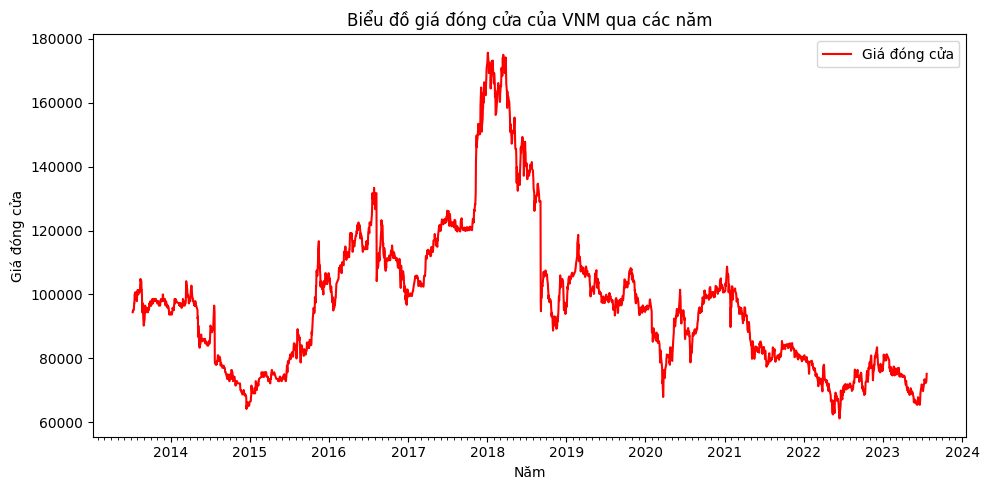

In [578]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator # Thêm MonthLocator vào để sửa lỗi

# Chuyển đổi cột "Ngày" sang dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Sắp xếp lại dữ liệu theo thứ tự thời gian
df = df.sort_values(by='Ngày')

# Chuyển đổi định dạng các cột giá thành số thực
df['Đóng cửa'] = df['Đóng cửa'].str.replace(',', '').astype(float)
df['Mở cửa'] = df['Mở cửa'].str.replace(',', '').astype(float)
df['Cao nhất'] = df['Cao nhất'].str.replace(',', '').astype(float)
df['Thấp nhất'] = df['Thấp nhất'].str.replace(',', '').astype(float)

# Lấy thông tin năm từ cột "Ngày"
df['Năm'] = df['Ngày'].dt.year

# Tạo đồ thị giá đóng cửa qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df['Ngày'], df['Đóng cửa'], label='Giá đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa của VNM qua các năm')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()


In [579]:
df1 = pd.DataFrame(df,columns=['Ngày','Đóng cửa'])
df1.index = df1.Ngày
df1.drop('Ngày',axis=1,inplace=True)
df1

,Đóng cửa
Ngày,
2013-07-10,94444.0
2013-07-11,94444.0
2013-07-12,95139.0
2013-07-15,95139.0
2013-07-16,96528.0
...,...
2023-07-18,72400.0
2023-07-19,72600.0
2023-07-20,72700.0


In [580]:
#chia tập dữ liệu
data = df1.values
train_data = data[:1500]
test_data = data[1500:]

In [581]:
data

array([[94444.],
       [94444.],
       [95139.],
       ...,
       [72700.],
       [73500.],
       [75200.]])

In [582]:
#chuẩn hóa dữ liệu
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data)

In [583]:
#tạo vòng lặp các giá trị
x_train,y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(sc_train[i-50:i,0]) #lấy 50 giá đóng cửa liên tục
  y_train.append(sc_train[i,0]) #lấy ra giá đóng cửa ngày hôm sau

In [584]:
x_train

[array([0.29027738, 0.29027738, 0.29635691, 0.29635691, 0.30850724,
        0.31457803, 0.31457803, 0.33887869, 0.34494948, 0.34494948,
        0.32672836, 0.33279915, 0.33887869, 0.32065757, 0.32672836,
        0.34494948, 0.34494948, 0.35102902, 0.33887869, 0.35102902,
        0.34494948, 0.34494948, 0.34494948, 0.34494948, 0.35709981,
        0.36925013, 0.38140046, 0.37532967, 0.37532967, 0.35102902,
        0.35102902, 0.33279915, 0.29027738, 0.31457803, 0.30850724,
        0.27205626, 0.26598547, 0.25383514, 0.27205626, 0.29027738,
        0.30850724, 0.30850724, 0.29027738, 0.3024277 , 0.3024277 ,
        0.29635691, 0.3024277 , 0.29635691, 0.29635691, 0.29027738]),
 array([0.29027738, 0.29635691, 0.29635691, 0.30850724, 0.31457803,
        0.31457803, 0.33887869, 0.34494948, 0.34494948, 0.32672836,
        0.33279915, 0.33887869, 0.32065757, 0.32672836, 0.34494948,
        0.34494948, 0.35102902, 0.33887869, 0.35102902, 0.34494948,
        0.34494948, 0.34494948, 0.34494948, 0.

In [585]:
y_train

[0.2963569134842401,
 0.30242770379791795,
 0.2963569134842401,
 0.30242770379791795,
 0.3145780319617488,
 0.30850724164807086,
 0.3145780319617488,
 0.32065756981190174,
 0.30850724164807086,
 0.3145780319617488,
 0.30850724164807086,
 0.3145780319617488,
 0.3145780319617488,
 0.3145780319617488,
 0.3267283601255797,
 0.3145780319617488,
 0.3145780319617488,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.32065756981190174,
 0.3145780319617488,
 0.3145780319617488,
 0.3145780319617488,
 0.32065756981190174,
 0.32065756981190174,
 0.3145780319617488,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.32065756

In [586]:
#xếp dữ liệu thành 1 mảng 2 chiều
x_train = np.array(x_train)
y_train = np.array(y_train)

#xếp lại dữ liệu thành mảng 1 chiều
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

print(y_train)

[[0.29635691]
 [0.3024277 ]
 [0.29635691]
 ...
 [0.31743848]
 [0.32298441]
 [0.33267668]]


# Bước 5: Xây dựng và huấn luyện mô hình

In [587]:
#xây dựng mô hình
model = Sequential() #tạo lớp mạng cho dữ liệu đầu vào
#2 lớp SimpleRNN
# model.add(SimpleRNN(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
# model.add(SimpleRNN(units=64))
#2 lớp RNN với SimpleRNNCell
model.add(RNN(SimpleRNNCell(128), input_shape=(x_train.shape[1],1), return_sequences=True))
model.add(RNN(SimpleRNNCell(64)))
model.add(Dropout(0.5)) #loại bỏ 1 số đơn vị tránh học tủ (overfitting)

model.add(Dense(1)) #output đầu ra 1 chiều
#đo sai số tuyệt đối trung bình có sử dụng trình tối ưu hóa adam
model.compile(loss='mean_absolute_error',optimizer='adam')


c:\Users\BMQ\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#huấn luyện mô hình
# save_model = "/content/drive/MyDrive/dataset/save_model.hdf5"
save_model = "C:\\recurrent-neuron-netwwork\\git\\RNNs\\StockPredictVinamilk\\save_model.keras"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])

Epoch 1/100


In [ ]:
#dữ liệu train
y_train = sc.inverse_transform(y_train) #giá thực
final_model = load_model("C:\\recurrent-neuron-netwwork\\git\\RNNs\\StockPredictVinamilk\\save_model.keras")
y_train_predict = final_model.predict(x_train) #dự đoán giá đóng cửa trên tập đã train
y_train_predict = sc.inverse_transform(y_train_predict) #giá dự đoán

# Bước 6: Tái sử dụng mô hình

In [ ]:
#xử lý dữ liệu test
test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(50,test.shape[0]):
  x_test.append(sc_test[i-50:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#dữ liệu test
y_test = data[1500:] #giá thực
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict) #giá dự đoán

# Độ chính xác của mô hình

In [ ]:
#lập biểu đồ so sánh
train_data1 = df1[50:1500]
test_data1 = df1[1500:]

plt.figure(figsize=(24,8))
plt.plot(df1,label='Giá thực tế',color='red') #đường giá thực
train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
plt.plot(train_data1['Dự đoán'],label='Giá dự đoán train',color='green') #đường giá dự báo train
test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu
plt.plot(test_data1['Dự đoán'],label='Giá dự đoán test',color='blue') #đường giá dự báo test
plt.title('So sánh giá dự báo và giá thực tế') #đặt tên biểu đồ
plt.xlabel('Thời gian') #đặt tên hàm x
plt.ylabel('Giá đóng cửa (VNĐ)') #đặt tên hàm y
plt.legend() #chú thích
plt.show()

In [ ]:
#r2
print('Độ phù hợp tập train:',r2_score(y_train,y_train_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập train (VNĐ):',mean_absolute_error(y_train,y_train_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_absolute_percentage_error(y_train,y_train_predict))

In [ ]:
train_data1

In [ ]:
#r2
print('Độ phù hợp tập test:',r2_score(y_test,y_test_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập test (VNĐ):',mean_absolute_error(y_test,y_test_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_absolute_percentage_error(y_test,y_test_predict))

In [ ]:
test_data1

# Thử dự đoán giá tương lai và so sánh với giá ngày cuối

In [ ]:
# Lấy ngày kế tiếp sau ngày cuối cùng trong tập dữ liệu để dự đoán
next_date = df['Ngày'].iloc[-1] + pd.Timedelta(days=1)

# Chuyển đổi ngày kế tiếp sang dạng datetime
next_date = pd.to_datetime(next_date)

# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
next_closing_price = np.array([df['Đóng cửa'].iloc[-1]])  # Lấy giá trị đóng cửa của ngày cuối cùng

# Chuẩn hóa giá trị của ngày cuối cùng
next_closing_price_normalized = sc.transform(next_closing_price.reshape(-1, 1))  # Chuyển thành mảng 2D

# Tạo dự đoán cho ngày kế tiếp bằng mô hình đã huấn luyện
x_next = np.array([sc_train[-50:, 0]])  # Lấy 50 giá đóng cửa gần nhất
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1], 1))
y_next_predict = final_model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)

# Thêm dữ liệu dự đoán của ngày kế tiếp vào DataFrame
df_next = pd.DataFrame({'Ngày': [next_date], 'Đóng cửa': [y_next_predict[0][0]]})
df1 = pd.concat([df1, df_next])

# Vẽ biểu đồ mới với dự đoán cho ngày kế tiếp
plt.figure(figsize=(15, 5))
plt.plot(df1['Ngày'], df1['Đóng cửa'], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Dự đoán'], label='Giá dự đoán train', color='green')
plt.plot(test_data1.index, test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')
plt.scatter([next_date], [y_next_predict[0][0]], color='orange', label='Dự đoán ngày kế tiếp')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế')
plt.legend()
plt.show()


In [ ]:
# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
actual_closing_price = df['Đóng cửa'].iloc[-1]

# Tạo DataFrame so sánh giá dự đoán với giá ngày cuối trong tập dữ liệu
comparison_df = pd.DataFrame({'Ngày': [next_date], 'Giá dự đoán': [y_next_predict[0][0]], 'Giá ngày trước': [actual_closing_price]})

# In ra bảng so sánh
print(comparison_df)

In [514]:
#chuẩn hóa dữ liệu
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data)

In [515]:
#tạo vòng lặp các giá trị
x_train,y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(sc_train[i-50:i,0]) #lấy 50 giá đóng cửa liên tục
  y_train.append(sc_train[i,0]) #lấy ra giá đóng cửa ngày hôm sau

In [ ]:
x_train

In [ ]:
y_train

In [518]:
#xếp dữ liệu thành 1 mảng 2 chiều
x_train = np.array(x_train)
y_train = np.array(y_train)

#xếp lại dữ liệu thành mảng 1 chiều
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

y_train

# Bước 5: Xây dựng và huấn luyện mô hình

In [ ]:
#xây dựng mô hình
model = Sequential() #tạo lớp mạng cho dữ liệu đầu vào
#2 lớp SimpleRNN
# model.add(SimpleRNN(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
# model.add(SimpleRNN(units=64))
#2 lớp RNN với SimpleRNNCell
model.add(RNN(SimpleRNNCell(128), input_shape=(x_train.shape[1],1), return_sequences=True))
model.add(RNN(SimpleRNNCell(64)))
model.add(Dropout(0.5)) #loại bỏ 1 số đơn vị tránh học tủ (overfitting)

model.add(Dense(1)) #output đầu ra 1 chiều
#đo sai số tuyệt đối trung bình có sử dụng trình tối ưu hóa adam
model.compile(loss='mean_absolute_error',optimizer='adam')


In [ ]:
#huấn luyện mô hình
# save_model = "/content/drive/MyDrive/dataset/save_model.hdf5"
save_model = "C:\\recurrent-neuron-netwwork\\git\\RNNs\\StockPredictVinamilk\\save_model.keras"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])

In [ ]:
#dữ liệu train
y_train = sc.inverse_transform(y_train) #giá thực
final_model = load_model("C:\\recurrent-neuron-netwwork\\git\\RNNs\\StockPredictVinamilk\\save_model.keras")
y_train_predict = final_model.predict(x_train) #dự đoán giá đóng cửa trên tập đã train
y_train_predict = sc.inverse_transform(y_train_predict) #giá dự đoán

# Bước 6: Tái sử dụng mô hình

In [ ]:
#xử lý dữ liệu test
test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(50,test.shape[0]):
  x_test.append(sc_test[i-50:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#dữ liệu test
y_test = data[1500:] #giá thực
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict) #giá dự đoán

# Độ chính xác của mô hình

In [ ]:
#lập biểu đồ so sánh
train_data1 = df1[50:1500]
test_data1 = df1[1500:]

plt.figure(figsize=(24,8))
plt.plot(df1,label='Giá thực tế',color='red') #đường giá thực
train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
plt.plot(train_data1['Dự đoán'],label='Giá dự đoán train',color='green') #đường giá dự báo train
test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu
plt.plot(test_data1['Dự đoán'],label='Giá dự đoán test',color='blue') #đường giá dự báo test
plt.title('So sánh giá dự báo và giá thực tế') #đặt tên biểu đồ
plt.xlabel('Thời gian') #đặt tên hàm x
plt.ylabel('Giá đóng cửa (VNĐ)') #đặt tên hàm y
plt.legend() #chú thích
plt.show()

In [ ]:
#r2
print('Độ phù hợp tập train:',r2_score(y_train,y_train_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập train (VNĐ):',mean_absolute_error(y_train,y_train_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_absolute_percentage_error(y_train,y_train_predict))

In [ ]:
train_data1

In [ ]:
#r2
print('Độ phù hợp tập test:',r2_score(y_test,y_test_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập test (VNĐ):',mean_absolute_error(y_test,y_test_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_absolute_percentage_error(y_test,y_test_predict))

In [ ]:
test_data1

# Thử dự đoán giá tương lai và so sánh với giá ngày cuối

In [ ]:
# Lấy ngày kế tiếp sau ngày cuối cùng trong tập dữ liệu để dự đoán
next_date = df['Ngày'].iloc[-1] + pd.Timedelta(days=1)

# Chuyển đổi ngày kế tiếp sang dạng datetime
next_date = pd.to_datetime(next_date)

# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
next_closing_price = np.array([df['Đóng cửa'].iloc[-1]])  # Lấy giá trị đóng cửa của ngày cuối cùng

# Chuẩn hóa giá trị của ngày cuối cùng
next_closing_price_normalized = sc.transform(next_closing_price.reshape(-1, 1))  # Chuyển thành mảng 2D

# Tạo dự đoán cho ngày kế tiếp bằng mô hình đã huấn luyện
x_next = np.array([sc_train[-50:, 0]])  # Lấy 50 giá đóng cửa gần nhất
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1], 1))
y_next_predict = final_model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)

# Thêm dữ liệu dự đoán của ngày kế tiếp vào DataFrame
df_next = pd.DataFrame({'Ngày': [next_date], 'Đóng cửa': [y_next_predict[0][0]]})
df1 = pd.concat([df1, df_next])

# Vẽ biểu đồ mới với dự đoán cho ngày kế tiếp
plt.figure(figsize=(15, 5))
plt.plot(df1['Ngày'], df1['Đóng cửa'], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Dự đoán'], label='Giá dự đoán train', color='green')
plt.plot(test_data1.index, test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')
plt.scatter([next_date], [y_next_predict[0][0]], color='orange', label='Dự đoán ngày kế tiếp')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế')
plt.legend()
plt.show()


In [ ]:
# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
actual_closing_price = df['Đóng cửa'].iloc[-1]

# Tạo DataFrame so sánh giá dự đoán với giá ngày cuối trong tập dữ liệu
comparison_df = pd.DataFrame({'Ngày': [next_date], 'Giá dự đoán': [y_next_predict[0][0]], 'Giá ngày trước': [actual_closing_price]})

# In ra bảng so sánh
print(comparison_df)

# Bước 2: Đọc dữ liệu

In [ ]:
# đọc dữ liệu từ file csv
df = pd.read_csv('D:\\Documents For Study\\Source Code\\RNN_ver2\\RNNs\\StockPredictVinamilk\\dataset.csv')

# Xóa hai dòng "KL" và "Thay đổi %" từ DataFrame dataSet
df = df.drop(columns=["KL", "% Thay đổi"])

# Hiển thị lại DataFrame sau khi xóa
print(df)

# Bước 3: Mô tả dữ liệu

In [395]:
#định dạng cấu trúc thời gian
df["Ngày"] = pd.to_datetime(df.Ngày,format="%d/%m/%Y")

In [ ]:
#kích thước dữ liệu
df.shape

In [ ]:
#dữ liệu 5 dòng đầu
df.head()

In [ ]:
#xác định kiểu dữ liệu
df.info()

In [ ]:
#mô tả bộ dữ liệu
df.describe()

# Bước 4: Tiền xử lý dữ liệu

In [ ]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator # Thêm MonthLocator vào để sửa lỗi

# Chuyển đổi cột "Ngày" sang dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Sắp xếp lại dữ liệu theo thứ tự thời gian
df = df.sort_values(by='Ngày')

# Chuyển đổi định dạng các cột giá thành số thực
df['Đóng cửa'] = df['Đóng cửa'].str.replace(',', '').astype(float)
df['Mở cửa'] = df['Mở cửa'].str.replace(',', '').astype(float)
df['Cao nhất'] = df['Cao nhất'].str.replace(',', '').astype(float)
df['Thấp nhất'] = df['Thấp nhất'].str.replace(',', '').astype(float)

# Lấy thông tin năm từ cột "Ngày"
df['Năm'] = df['Ngày'].dt.year

# Tạo đồ thị giá đóng cửa qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df['Ngày'], df['Đóng cửa'], label='Giá đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa của VNM qua các năm')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()


In [ ]:
df1 = pd.DataFrame(df,columns=['Ngày','Đóng cửa'])
df1.index = df1.Ngày
df1.drop('Ngày',axis=1,inplace=True)
df1

In [402]:
#chia tập dữ liệu
data = df1.values
train_data = data[:1500]
test_data = data[1500:]

In [ ]:
data

In [404]:
#chuẩn hóa dữ liệu
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data)

In [405]:
#tạo vòng lặp các giá trị
x_train,y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(sc_train[i-50:i,0]) #lấy 50 giá đóng cửa liên tục
  y_train.append(sc_train[i,0]) #lấy ra giá đóng cửa ngày hôm sau

In [ ]:
x_train

In [ ]:
y_train

In [420]:
#xếp dữ liệu thành 1 mảng 2 chiều
x_train = np.array(x_train)
y_train = np.array(y_train)

#xếp lại dữ liệu thành mảng 1 chiều
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

# Bước 5: Xây dựng và huấn luyện mô hình

In [ ]:
#xây dựng mô hình
model = Sequential() #tạo lớp mạng cho dữ liệu đầu vào
#2 lớp SimpleRNN
# model.add(SimpleRNN(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
# model.add(SimpleRNN(units=64))
#2 lớp RNN với SimpleRNNCell
model.add(RNN(SimpleRNNCell(128), input_shape=(x_train.shape[1],1), return_sequences=True))
model.add(RNN(SimpleRNNCell(64)))
model.add(Dropout(0.5)) #loại bỏ 1 số đơn vị tránh học tủ (overfitting)

model.add(Dense(1)) #output đầu ra 1 chiều
#đo sai số tuyệt đối trung bình có sử dụng trình tối ưu hóa adam
model.compile(loss='mean_absolute_error',optimizer='adam')


In [ ]:
#huấn luyện mô hình
# save_model = "/content/drive/MyDrive/dataset/save_model.hdf5"
save_model = "C:\\recurrent-neuron-netwwork\\git\\RNNs\\StockPredictVinamilk\\save_model.keras"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])

In [ ]:
#dữ liệu train
y_train = sc.inverse_transform(y_train) #giá thực
final_model = load_model("C:\\recurrent-neuron-netwwork\\git\\RNNs\\StockPredictVinamilk\\save_model.keras")
y_train_predict = final_model.predict(x_train) #dự đoán giá đóng cửa trên tập đã train
y_train_predict = sc.inverse_transform(y_train_predict) #giá dự đoán

# Bước 6: Tái sử dụng mô hình

In [ ]:
#xử lý dữ liệu test
test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(50,test.shape[0]):
  x_test.append(sc_test[i-50:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#dữ liệu test
y_test = data[1500:] #giá thực
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict) #giá dự đoán

# Độ chính xác của mô hình

In [ ]:
#lập biểu đồ so sánh
train_data1 = df1[50:1500]
test_data1 = df1[1500:]

plt.figure(figsize=(24,8))
plt.plot(df1,label='Giá thực tế',color='red') #đường giá thực
train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
plt.plot(train_data1['Dự đoán'],label='Giá dự đoán train',color='green') #đường giá dự báo train
test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu
plt.plot(test_data1['Dự đoán'],label='Giá dự đoán test',color='blue') #đường giá dự báo test
plt.title('So sánh giá dự báo và giá thực tế') #đặt tên biểu đồ
plt.xlabel('Thời gian') #đặt tên hàm x
plt.ylabel('Giá đóng cửa (VNĐ)') #đặt tên hàm y
plt.legend() #chú thích
plt.show()

In [ ]:
#r2
print('Độ phù hợp tập train:',r2_score(y_train,y_train_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập train (VNĐ):',mean_absolute_error(y_train,y_train_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_absolute_percentage_error(y_train,y_train_predict))

In [ ]:
train_data1

In [ ]:
#r2
print('Độ phù hợp tập test:',r2_score(y_test,y_test_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập test (VNĐ):',mean_absolute_error(y_test,y_test_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_absolute_percentage_error(y_test,y_test_predict))

In [ ]:
test_data1

# Thử dự đoán giá tương lai và so sánh với giá ngày cuối

In [ ]:
# Lấy ngày kế tiếp sau ngày cuối cùng trong tập dữ liệu để dự đoán
next_date = df['Ngày'].iloc[-1] + pd.Timedelta(days=1)

# Chuyển đổi ngày kế tiếp sang dạng datetime
next_date = pd.to_datetime(next_date)

# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
next_closing_price = np.array([df['Đóng cửa'].iloc[-1]])  # Lấy giá trị đóng cửa của ngày cuối cùng

# Chuẩn hóa giá trị của ngày cuối cùng
next_closing_price_normalized = sc.transform(next_closing_price.reshape(-1, 1))  # Chuyển thành mảng 2D

# Tạo dự đoán cho ngày kế tiếp bằng mô hình đã huấn luyện
x_next = np.array([sc_train[-50:, 0]])  # Lấy 50 giá đóng cửa gần nhất
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1], 1))
y_next_predict = final_model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)

# Thêm dữ liệu dự đoán của ngày kế tiếp vào DataFrame
df_next = pd.DataFrame({'Ngày': [next_date], 'Đóng cửa': [y_next_predict[0][0]]})
df1 = pd.concat([df1, df_next])

# Vẽ biểu đồ mới với dự đoán cho ngày kế tiếp
plt.figure(figsize=(15, 5))
plt.plot(df1['Ngày'], df1['Đóng cửa'], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Dự đoán'], label='Giá dự đoán train', color='green')
plt.plot(test_data1.index, test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')
plt.scatter([next_date], [y_next_predict[0][0]], color='orange', label='Dự đoán ngày kế tiếp')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế')
plt.legend()
plt.show()


In [ ]:
# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
actual_closing_price = df['Đóng cửa'].iloc[-1]

# Tạo DataFrame so sánh giá dự đoán với giá ngày cuối trong tập dữ liệu
comparison_df = pd.DataFrame({'Ngày': [next_date], 'Giá dự đoán': [y_next_predict[0][0]], 'Giá ngày trước': [actual_closing_price]})

# In ra bảng so sánh
print(comparison_df)